# Programación para la Bioinformática

Unidad 4: ADN, ARN, secuencias y motivos (Parte 2)
--------------------------------------------------

## Etiquetas

Bienvenidos a la PEC de la unidad 2. Bajo estas lineas encontrareis Ejercicios y preguntas cada uno de ellos tendrá una etiqueta que indica los recursos necesarios para resolverlos. Hay tres posibles etiquetas:



* **<font color="green" size="+2">MU</font>** **Materiales unidad**: las herramientas necesarias para realizar la actividad se pueden encontrar en los materiales de la asignatura.

* **<font color="blue" size="+2">EG</font>** **Consulta externa guiada**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, pero el enunciado contiene indicaciones de como encontrar la información adicional necesaria.

* **<font color="gold" size="+2">CI</font>** **Consulta externa independiente**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, y el enunciado no incluye las indicaciones de como encontrar la información adicional. El estudiante deberá buscar esta información independientemente.)

## Tests

Antes de nada, decir que en el ámbito de la programación es muy común utilizar tests (llamados tests unitarios) durante la codificación de los programas. Los tests sirven para saber si un programa se comporta como se espera. Es decir, sirven para validar la funcionalidad del programa, no para determinar la calidad del código.

Así pues, los tests son un gran aliado del programador. Es por eso que la mayoría de los ejercicios e incluso alguna de las preguntas tendran una celda bajo ellas con un comentario en la primera línea con el título: `# Test Ejercicio X` o `Test Pregunta X`

**IMPORTANTE**: **no debéis modificar las celdas de test**.

Si las ejecutáis, lo que CoLab hará será ejecutar el test correspondiente sobre vuestro código. Dependiendo del resultado, sabréis que:

* Si el test falla, entonces vuestro código no funciona como se espera. Así pues, tendréis que corregirlo.

* Si el test no falla, entonces vuestro código se comporta como se espera. Sin embargo, esto no significa que el el ejercicio sea correcto, ya que hay situaciones en las que se pide usar una determinada función o estructura. Por ejemplo, imaginad que se pide resolver un ejercicio usando un ``for`` y, en su lugar, usáis un ``while``. Pues seguramente vuestro programa pasaría el test (porque funciona como se espera), pero no respeta un requisito del enunciado.

**Para poder ejecutar los tests primero debéis ejecutar la siguiente celda de código**: (Tan solo una vez por sesión)


In [ ]:
!pip install ipytest
import ipytest
ipytest.autoconfig()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.0 MB/s eta 0:00:00


###**Ejercicios evaluables**

### Instrucciones de uso
A continuación se presentará la teoría y algún ejemplo de algoritmo genético. Recordad que podéis ir ejecutando los ejemplos para obtener sus resultados.

### Algoritmos inspirados en la naturaleza
Existe una categoría de algoritmos que utilizan conceptos basados o inspirados en la naturaleza estableciendo una metáfora que los hace más comprensibles para los humanos. Muy populares en algoritmos de inteligencia artificial, empezaron a aparecer en la década de los 70 del siglo pasado y en la última década han explotado hasta convertirse en métodos casi estándares.

Una familia de algoritmos de inteligencia artificial inspirados en la naturaleza muy populares son los **algoritmos genéticos**. Los algoritmos genéticos utilizan conceptos de la genética, como son las mutaciones, los mecanismos de selección o los cruces. Los algoritmos genéticos se utilizan con el objetivo de optimizar valores de una función cualquiera en su espacio de valores. El funcionamiento básico del algoritmo está descrito en la siguiente figura (fuente Wikipedia - https://es.wikipedia.org/wiki/Algoritmo_gen%C3%A9tico):

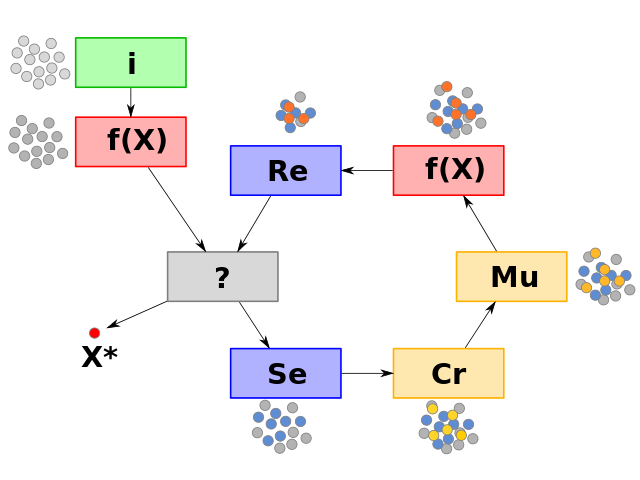

* **Inicialización** (I). Se genera aleatoriamente una población inicial, constituida por un conjunto de cromosomas (o también llamados genes) que representan posibles soluciones del problema. Esta población deberá tener una diversidad inicial lo suficientemente rica para garantizar que el algoritmo no converja de forma prematura en soluciones no óptimas.
* **Evaluación** (?). Para cada uno de los cromosomas, lo evaluaremos en el espacio de búsqueda (aplicaremos la función que deseamos optimizar) y después calcularemos la distancia a la solución que queremos obtener. Esta solución objetivo es muy importante y está codificada en la función de *fitness* que dirigirá la evolución hacia esa solución óptima (podemos conocerla o no, en este segundo caso, la expresaremos en forma de función: cuán rápido es un coche, cuál es la cantidad monetaria más grande, etc.). Deberemos, además, definir las condiciones de parada del algoritmo para no entrar en bucle infinito: o bien acotando el número de pasos del algoritmo o bien cuando en la población ya no haya cambios.
* **Selección** (Se). Si no se ha dado la condición de parada, se procede a elegir los cromosomas que serán cruzados en la siguiente generación, para ello, seleccionaremos los mejores cromosomas ordenándolos por su aptitud.
* **Cruce** (Cr). Representa en esta metáfora la reproducción sexual y opera sobre dos cromosomas a la vez para generar dos descendientes donde se combinan las características de ambos cromosomas padres.
* **Mutación** (Mu). Modifica de forma aleatoria parte del cromosoma de los individuos de la población para añadir diversidad y poder salir de pozos locales en el espacio de búsqueda.
* **Reemplazo** (Re). Una vez aplicados los operadores genéticos, se seleccionan los mejores individuos para conformar la población de la generación siguiente y continuar con otro paso de la simulación.

### Ejercicio 1 **<font color="gold" size="+2">CI</font>**
El siguiente código es una implementación de un algoritmo genético que optimiza la búsqueda de un string, es decir, dado un string **objetivo**, intenta encontrar esa cadena empezando desde diversas cadenas con caracteres aleatorios.

In [ ]:
import random
import string

# Esta es la cadena objetivo que queremos obtener y que nuestro algoritmo genético
# intentará encontrar empezando desde cadenas aleatorias:
objetivo = "bioinformatics_programming"

# Número de genes de nuestro algoritmo. Es un parámetro importante puesto que
# la velocidad de convergencia a la solución objetivo puede depender de ello.
GENES = 50
# El número máximo de generaciones antes de la convergencia
MAX_GENERACION = 20000


# Modelizamos un individuo de la población mediante una clase
class Individuo(object):
    def __init__(self, adn, fitness):
        self.adn = adn
        self.fitness = fitness

# Función para calcular el fitness (lo buena que es una solución respecto del objetivo)
def calcular_fitness(origen, valor_objetivo):
    fitness = 0
    # Utilizamos el valor numérico de la cadena de texto que representa el adn de un individuo
    for i in range(0, len(origen)):
        fitness += (ord(valor_objetivo[i]) - ord(origen[i])) ** 2
    return fitness

# Función que se encarga de variar el adn de un individuo (mutarlo), para conseguir nuevas
# soluciones que puedan ser evaluadas. Sin esta función, no podríamos generar nuevos candidatos
# y evaluarlos.
def mutacion(padre1, padre2):
    adn_hijo = padre1.adn[:]

    # definimos la región a mutar
    start = random.randint(0, len(padre2.adn) - 1)
    stop = random.randint(0, len(padre2.adn) - 1)
    if start > stop:
        stop, start = start, stop

    adn_hijo[start:stop] = padre2.adn[start:stop]

    # Recalculamos el ADN del individuo hijo y su nuevo fitness
    posicion = random.randint(0, len(adn_hijo) - 1)
    adn_hijo[posicion] = chr(ord(adn_hijo[posicion]) + random.randint(-1, 1))
    fitness_hijo = calcular_fitness(adn_hijo, objetivo)
    return Individuo(adn_hijo, fitness_hijo)


# Selecciamos al azar a los padres de un nuevo hijo (cruce)
def padre_al_azar(poblacion):
    return poblacion[int(random.random() * random.random() * (GENES - 1))]


# Función que se encarga de mostrar la población actual
def escribe_generacion(generacion, poblacion):
    print('Pasos de simulación: %d' % generacion)
    print()
    print('  Fitness         ADN')
    print('------------------------')
    for candidato in poblacion:
        print("%6i %15s" % (candidato.fitness, ''.join(candidato.adn)))
    print()


# Función que inicializa la población (por cada individuo, le da un valor aleatorio a cada gen)
def inicializa_poblacion():
    poblacion = []
    for i in range(0, GENES):
        adn = [random.choice(string.printable[:-5]) for _ in range(0, len(objetivo))]
        fitness = calcular_fitness(adn, objetivo)
        candidate = Individuo(adn, fitness)
        poblacion.append(candidate)
    return poblacion


# Función principal de la simulación
def simulacion():
    # Primero de todo, calculamos la población inicial
    poblacion = inicializa_poblacion()
    generacion = 0
    # Mientras que no hayamos encontrado el objetivo o se hayan superado el
    # máximo de generaciones a calcular:
    while True and generacion < MAX_GENERACION:
        generacion += 1
        # Ordenamos a los candidatos por su fitness (lo que se parecen al objetivo)
        poblacion.sort(key=lambda candidate: candidate.fitness)

        # Si hemos generado al individuo, hemos acabado (:
        if poblacion[0].fitness == 0:
            break

        # Si no, escogemos dos padres al azar para hacer el cruce
        padre1 = padre_al_azar(poblacion)
        padre2 = padre_al_azar(poblacion)

        # Generamos un nuevo hijo usando el material genético de los padres
        hijo = mutacion(padre1, padre2)
        if hijo.fitness < poblacion[-1].fitness:
            poblacion[-1] = hijo

    if generacion == MAX_GENERACION:
        print(u'Se ha alcanzado el máximo de generaciones')
    escribe_generacion(generacion, poblacion)


simulacion()

Pasos de simulación: 6518

  Fitness         ADN
------------------------
     0 bioinformatics_programming
     1 bioingormatics_programming
     1 bioingormatics_programming
     1 bioingormatics_programming
     2 bioimgormatics_programming
     2 bioimgormatics_programming
     2 bioimgormatics_programming
     2 bioimgormatics_programming
     2 bioingormatics_programning
     2 bioimgormatics_programming
     2 bioimgormatics_programming
     2 bioimgormatics_programming
     2 bioimgormatics_programming
     2 bioimgormatics_programming
     2 biohmformatics_programming
     2 biohmformatics_programming
     2 bioimgormatics_programming
     2 bioingormatics`programming
     2 bioimgormatics_programming
     2 bioimgormatics_programming
     2 bioimgormatics_programming
     2 bioimgormatics_programming
     2 bioingormatics`programming
     2 bioimgormatics_programming
     2 bioimgormatics_programming
     2 bioimgormatics_programming
     2 bioimgormatics_programming
     2 b

### Ejercicio 2 **<font color="green" size="+2">MU</font>**

Escribe una función de fitness alternativa a la función `calcular_fitness` del ejercicio 1. Una función alternativa se refiere a un cáclulo diferente del fitness. Un fitness=0 indica que la cadena objetivo se ha conseguido, es decir que vuestra solución debe cumplir ésta misma norma. Explica en qué consiste tu función de fitness. Para realizar este ejercicio, podéis copiar todo el código del ejercicio anterior y hacer las modificaciones pertinentes sobre la función `calcular_fitness()`.

In [ ]:
# Una función de fitness alternativa podría ser perfectamente
# tan solo tomar el absoluto de la diferencia:

def calcular_fitness_alternativa(origen, valor_objetivo):
    fitness = 0
    # Utilizamos el valor numérico de la cadena de texto que representa el adn de un individuo
    for i in range(0, len(origen)):
        fitness += abs(ord(valor_objetivo[i]) - ord(origen[i]))
    return fitness

In [ ]:
# Función para calcular el fitness (lo buena que es una solución respecto del objetivo)
def calcular_fitness(origen, valor_objetivo):
    fitness = 0
    # Utilizamos el valor numérico de la cadena de texto que representa el adn de un individuo
    for i in range(0, len(origen)):
        fitness += (ord(valor_objetivo[i]) - ord(origen[i])) ** 2
    return fitness

In [ ]:
!pip install ipytest
import ipytest
ipytest.autoconfig()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00


Testea que tu código es correcto con el siguiente test unitario


In [ ]:
%%ipytest
# Test Ejercicio 2
def test_fitness():
  assert calcular_fitness_alternativa("bioinformatics_programming", "bioinformatics_programming") == 0
  assert calcular_fitness_alternativa("bioinpormatics_porgrammang", "bioinformatics_programming") > 0
  assert calcular_fitness_alternativa("bbbbbbbbbbbbbb_ppppppppppp", "bioinformatics_programming") > calcular_fitness_alternativa("bioinpormatics_porgrammang", "bioinformatics_programming")

.                                                                                            [100%]
1 passed in 0.01s


### Ejercicio 3 **<font color="green" size="+2">MU</font>**

Representa utilizando matplotlib el máximo fitness, el mínimo y la media por paso de la simulación en un gráfico. Copiad y pegad el código del ejercicio 1 y haced las modificaciones pertinentes para que los datos que necesitáis representar se guarden a cada paso de la simulación.

Teneis que usar la funcion de fitness del ejercicio1 , no la que habeis definido en el ejercicio2.

El resultado debe ser similar al siguiente gráfico.



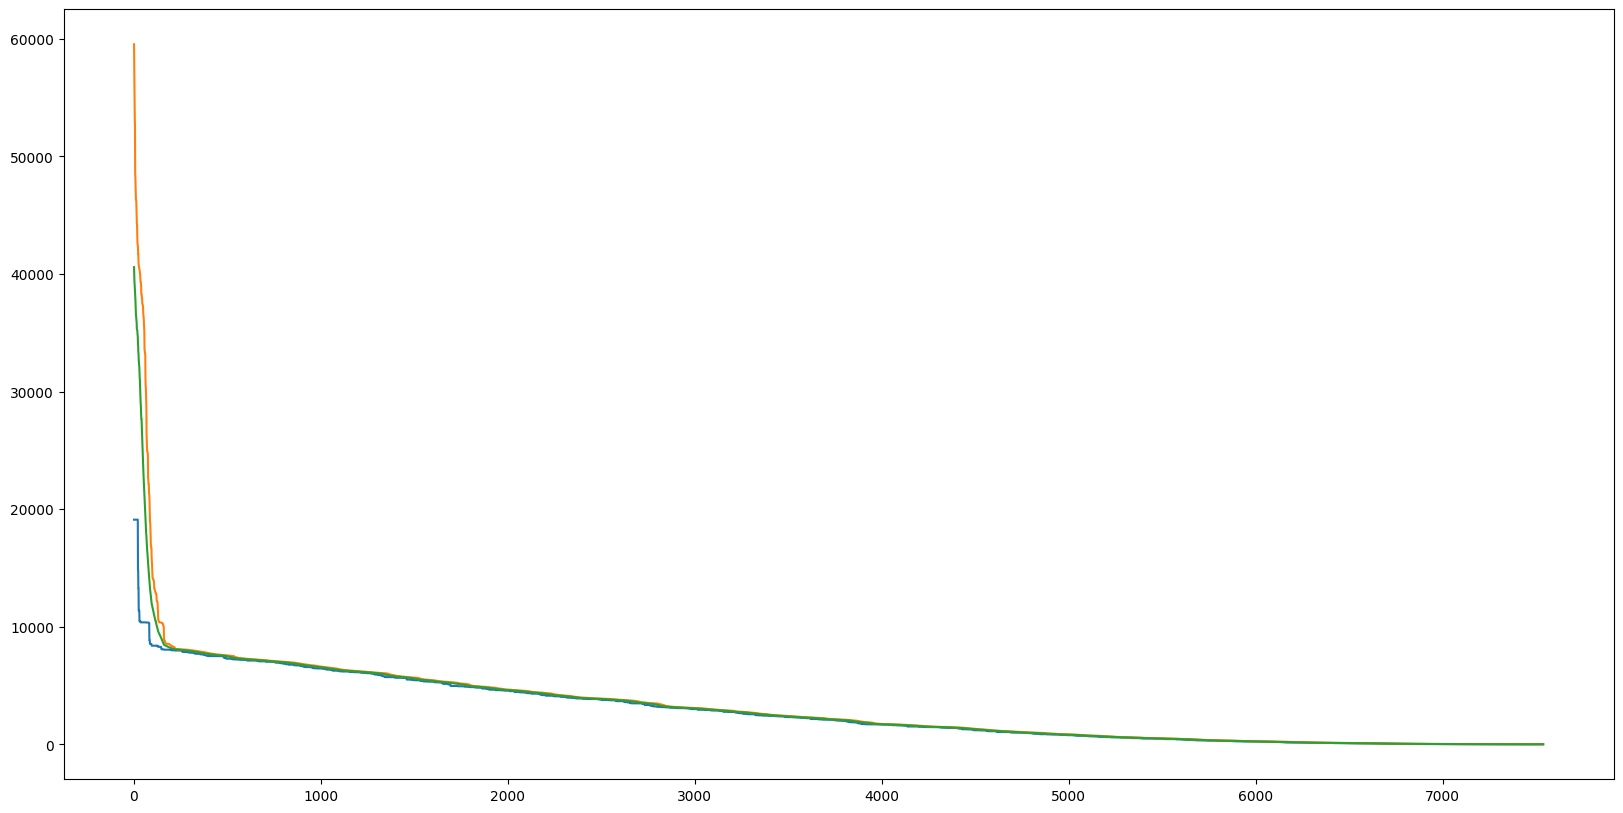

Pasos de simulación: 8090

  Fitness         ADN
------------------------
     0 bioinformatics_programming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 aioinformatics_programming
     1 bioinformatics_prngramming
     2 aioinformatics_prngramming
     2 aioinformatics_prngramming
     2 aioinformatics_prngramming
     2 aioinformatics_prngramming
     2 aioinformatics_prngramming
     2 bioinformatjcs_prngramming
     2 bioinformatics_prngramling
     2 aioinformatics_prngramming
     2 bioinformathcs_prngramming
     2 bioinformatics_prngqamming
     3 aioinformatics_prngsamming
     3 aioinfornatics_prngramming
     3 aioinfornatics_prngramming
     3 aioinformatics_psngramming
     3 aioinfornatics_prngramming
     3 aioinformatics_prngrammiog
     3 aioinformatics^prngramming
     3 aioinfornatics_prngramming
     3 aioinfornatics_prngramming
     3 aioinformatics_prnhramming
     3 aioinformasics_prngramming
     3 aioinformatics_prngrammjng
     3 a

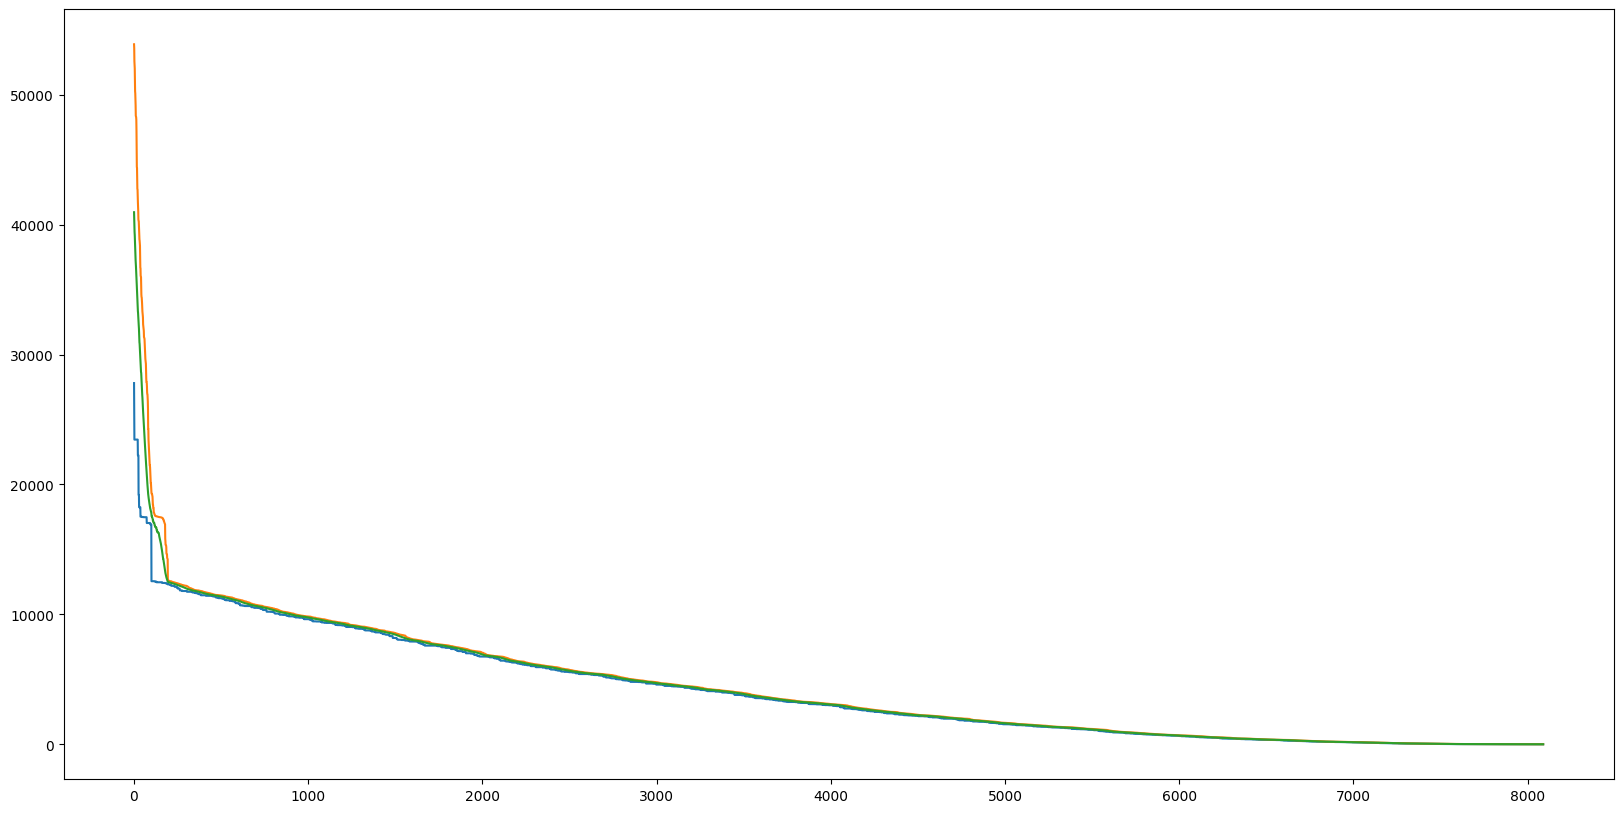

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import random
import string

# Esta es la cadena objetivo que queremos obtener y que nuestro algoritmo genético
# intentará encontrar empezando desde cadenas aleatorias:
objetivo = "bioinformatics_programming"

# Número de genes de nuestro algoritmo. Es un parámetro importante puesto que
# la velocidad de convergencia a la solución objetivo puede depender de ello.
GENES = 50
# El número máximo de generaciones antes de la convergencia
MAX_GENERACION = 20000


# Modelizamos un individuo de la población mediante una clase
class Individuo(object):
    def __init__(self, adn, fitness):
        self.adn = adn
        self.fitness = fitness

# Función para calcular el fitness (lo buena que es una solución respecto del objetivo)
def calcular_fitness(origen, valor_objetivo):
    fitness = 0
    # Utilizamos el valor numérico de la cadena de texto que representa el adn de un individuo
    for i in range(0, len(origen)):
        fitness += (ord(valor_objetivo[i]) - ord(origen[i])) ** 2
    return fitness

# Función que se encarga de variar el adn de un individuo (mutarlo), para conseguir nuevas
# soluciones que puedan ser evaluadas. Sin esta función, no podríamos generar nuevos candidatos
# y evaluarlos.
def mutacion(padre1, padre2):
    adn_hijo = padre1.adn[:]

    # definimos la región a mutar
    start = random.randint(0, len(padre2.adn) - 1)
    stop = random.randint(0, len(padre2.adn) - 1)
    if start > stop:
        stop, start = start, stop

    adn_hijo[start:stop] = padre2.adn[start:stop]

    # Recalculamos el ADN del individuo hijo y su nuevo fitness
    posicion = random.randint(0, len(adn_hijo) - 1)
    adn_hijo[posicion] = chr(ord(adn_hijo[posicion]) + random.randint(-1, 1))
    fitness_hijo = calcular_fitness(adn_hijo, objetivo)
    return Individuo(adn_hijo, fitness_hijo)


# Selecciamos al azar a los padres de un nuevo hijo (cruce)
def padre_al_azar(poblacion):
    return poblacion[int(random.random() * random.random() * (GENES - 1))]


# Función que se encarga de mostrar la población actual
def escribe_generacion(generacion, poblacion):
    print('Pasos de simulación: %d' % generacion)
    print()
    print('  Fitness         ADN')
    print('------------------------')
    for candidato in poblacion:
        print("%6i %15s" % (candidato.fitness, ''.join(candidato.adn)))
    print()


# Función que inicializa la población (por cada individuo, le da un valor aleatorio a cada gen)
def inicializa_poblacion():
    poblacion = []
    for i in range(0, GENES):
        adn = [random.choice(string.printable[:-5]) for _ in range(0, len(objetivo))]
        fitness = calcular_fitness(adn, objetivo)
        candidate = Individuo(adn, fitness)
        poblacion.append(candidate)
    return poblacion


# Función principal de la simulación
def simulacion():
    # Vamos a guardarnos los diferentes valores de fitness obtenidos:
    fitness_values = []

    # Primero de todo, calculamos la población inicial
    poblacion = inicializa_poblacion()
    generacion = 0
    # Mientras que no hayamos encontrado el objetivo o se hayan superado el
    # máximo de generaciones a calcular:
    while True and generacion < MAX_GENERACION:
        generacion += 1
        # Ordenamos a los candidatos por su fitness (lo que se parecen al objetivo)
        poblacion.sort(key=lambda candidate: candidate.fitness)

        # Si hemos generado al individuo, hemos acabado (:
        if poblacion[0].fitness == 0:
            break

        fitness_values.append([indiv.fitness for indiv in poblacion])

        # Si no, escogemos dos padres al azar para hacer el cruce
        padre1 = padre_al_azar(poblacion)
        padre2 = padre_al_azar(poblacion)

        # Generamos un nuevo hijo usando el material genético de los padres
        hijo = mutacion(padre1, padre2)
        if hijo.fitness < poblacion[-1].fitness:
            poblacion[-1] = hijo

    if generacion == MAX_GENERACION:
        print(u'Se ha alcanzado el máximo de generaciones')
    escribe_generacion(generacion, poblacion)

    return fitness_values


fitness = simulacion()

# Hemos guardado para cada paso de simulación, los valores de fitness.
# Ahora vamos a procesarlos para prepararlos para la visualización:

pasos = [x for x in range(1, len(fitness)+1)]
min_fitness = []
max_fitness = []
mean_fitness = []
for simu in fitness:
    min_fitness.append(min(simu))
    max_fitness.append(max(simu))
    mean_fitness.append(sum(simu)/len(simu))

plt.figure(figsize=(20,10))
plt.plot(pasos, min_fitness)
plt.plot(pasos, max_fitness)
plt.plot(pasos, mean_fitness)
plt.show()

**Autoria**

Autores/as que han participado colectivamente en esta obra:

*   Gabriel Felipe Rodríguez Lozano
*   Pau Andrio Balado
*   Brian Jiménez García
*   Melchor Sanchez Martinez

**Fecha de creación**


*   Ultima modificación: Noviembre 2025